In [73]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [74]:
num_samples = 2000000

In [75]:
samples_df = pd.DataFrame({
    'coffee_p': np.cumsum(np.random.uniform(-1,1,(num_samples))),
    'oil_p': np.cumsum(np.random.uniform(-1,1,(num_samples))),
    'event_dummy': np.concatenate(
        ([0]*int(num_samples*1/4),
         [1]*int(num_samples*1/2), 
         [0]*int(num_samples*1/4)), axis=0)})

In [76]:
samples_df.head()

,coffee_p,event_dummy,oil_p
0,-0.056615,0,0.961410
1,0.087122,0,0.643446
2,0.133442,0,1.434460
3,0.796151,0,2.019712
4,1.500296,0,2.457884


In [77]:
samples_df.tail()

,coffee_p,event_dummy,oil_p
1999995,-653.107031,0,-270.011673
1999996,-652.388677,0,-269.913730
1999997,-652.874100,0,-270.082526
1999998,-653.420353,0,-269.830668
1999999,-652.584195,0,-269.375845


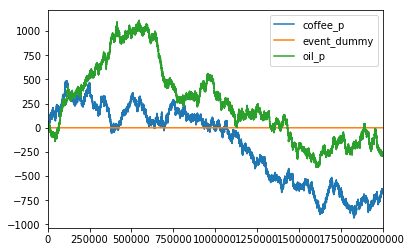

In [78]:
samples_df.plot()

In [79]:
import statsmodels.api as sm

In [80]:
y = samples_df['oil_p'].values
X = samples_df[['event_dummy', 'oil_p']].values

In [81]:
mod = sm.OLS(y, X)
res = mod.fit()

In [82]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.879e+34
Date:                Tue, 28 Nov 2017   Prob (F-statistic):               0.00
Time:                        20:45:19   Log-Likelihood:             5.1244e+07
No. Observations:             2000000   AIC:                        -1.025e+08
Df Residuals:                 1999998   BIC:                        -1.025e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.794e-12   2.11e-15   -849.797      0.000    -1.8e-12   -1.79e-12
x2             1.0000   3.15e-18   3.17e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                   191595.014   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234484.991
Skew:                          -0.817   Prob(JB):                         0.00
Kurtosis:                       2.618   Cond. No.                         783.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""